In [1]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
graphics_path = "./graphics"
os.makedirs(f"{graphics_path}/DEA", exist_ok=True)

sc.settings.set_figure_params(dpi=80, facecolor='white')

In [5]:
adata_annotated = sc.read(os.path.join(data_path, "adata_cnv_full.h5ad"))
adata_annotated.var.index = adata_annotated.var["gene_names"]

In [ ]:
# Compare all tumor vs all healthy

adata_annotated.obs["cnv_status"].value_counts()

sc.tl.rank_genes_groups(adata_annotated, 'cnv_status', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_annotated, n_genes=25, sharey=False, key="wilcoxon")

sc.pl.rank_genes_groups_violin(adata_annotated, n_genes=10, key="wilcoxon")

/home/vera/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:639: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


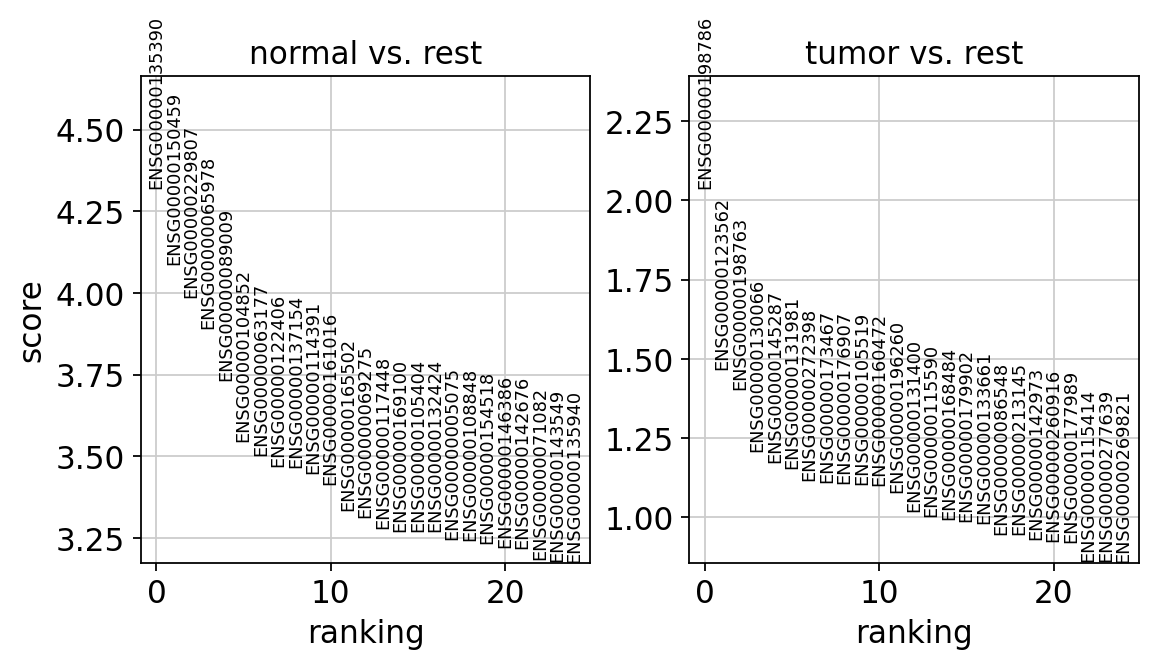

/home/vera/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1314: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


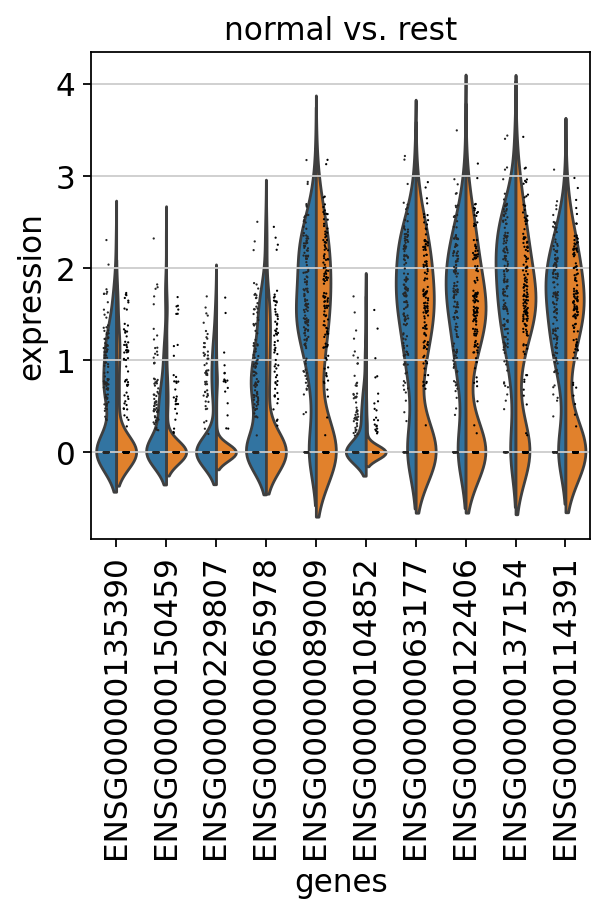

/home/vera/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1314: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


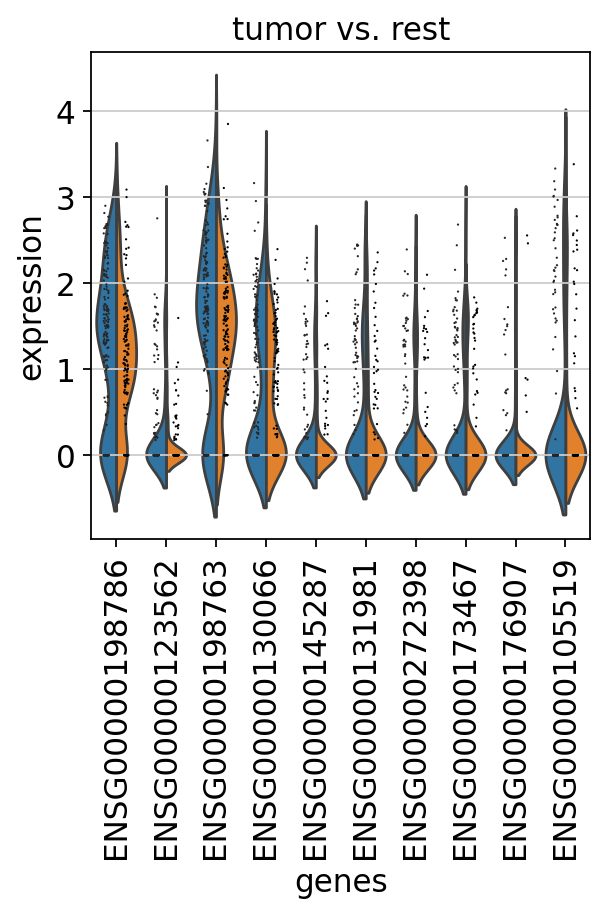

In [4]:
adata_cluster = adata_annotated[adata_annotated.obs["cell_type"] == "CAML"]

sc.tl.rank_genes_groups(adata_cluster, groupby='cnv_status', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_cluster, n_genes=25, sharey=False, key="wilcoxon")

sc.pl.rank_genes_groups_violin(adata_cluster, n_genes=10, key="wilcoxon")